# Solar Flare Dataset
The solar flare dataset, available at the UCI Machine Learning Repository, offers valuable insights into the characteristics and classifications of solar flares. Solar flares are sudden bursts of energy released from the Sun's surface, and their study is crucial for understanding solar activity and its impact on our planet. This dataset comprises features extracted from different types of flares, such as their duration, peak flux, and location on the Sun's surface. It serves as a comprehensive resource for researchers and data scientists interested in solar physics, space weather forecasting, and related fields. By exploring this dataset, we can gain a deeper understanding of the complex nature of solar flares and uncover patterns that can help improve our knowledge of these powerful astronomical phenomena.

In [131]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
import seaborn as sns

## Define the file on which we're operating and the names of the columns because they're not provided

In [132]:
dataset = "flare.data2"

headers = ["Class", "Largest Spot", "Spot Distribution", "Activity", "Evolution", "Previous Activity", "Complex",
           "Complex On Path", "Area", "Largest Spot Area", "C-Class", "M-Class", "X-Class"]

# importing dataset
df = pd.read_csv(dataset, sep=" ", header=None, skiprows=1, names=headers)
df

,Class,Largest Spot,Spot Distribution,Activity,Evolution,Previous Activity,Complex,Complex On Path,Area,Largest Spot Area,C-Class,M-Class,X-Class
0,H,A,X,1,3,1,1,1,1,1,0,0,0
1,D,R,O,1,3,1,1,2,1,1,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,H,R,X,1,2,1,1,1,1,1,0,0,0
4,H,S,X,1,1,1,1,2,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,H,S,X,1,2,1,1,1,1,1,0,0,0
1062,H,S,X,2,2,1,1,2,1,1,0,0,0
1063,C,S,O,1,2,1,2,2,1,1,0,0,0
1064,H,R,X,1,2,1,1,2,1,1,0,0,0


## Data Exploration

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Class              1066 non-null   object
 1   Largest Spot       1066 non-null   object
 2   Spot Distribution  1066 non-null   object
 3   Activity           1066 non-null   int64 
 4   Evolution          1066 non-null   int64 
 5   Previous Activity  1066 non-null   int64 
 6   Complex            1066 non-null   int64 
 7   Complex On Path    1066 non-null   int64 
 8   Area               1066 non-null   int64 
 9   Largest Spot Area  1066 non-null   int64 
 10  C-Class            1066 non-null   int64 
 11  M-Class            1066 non-null   int64 
 12  X-Class            1066 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 108.4+ KB


In [134]:
df.describe()

,Activity,Evolution,Previous Activity,Complex,Complex On Path,Area,Largest Spot Area,C-Class,M-Class,X-Class
count,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.0,1066.000000,1066.000000,1066.000000
mean,1.153846,2.401501,1.059099,1.404315,1.875235,1.025328,1.0,0.300188,0.046904,0.005629
std,0.360971,0.620584,0.320324,0.490989,0.330608,0.157194,0.0,0.835784,0.302811,0.086487
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.0,0.000000,0.000000,0.000000
50%,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.0,0.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,2.000000,2.000000,1.000000,1.0,0.000000,0.000000,0.000000
max,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.0,8.000000,5.000000,2.000000


array([[<Axes: title={'center': 'Activity'}>,
        <Axes: title={'center': 'Evolution'}>,
        <Axes: title={'center': 'Previous Activity'}>],
       [<Axes: title={'center': 'Complex'}>,
        <Axes: title={'center': 'Complex On Path'}>,
        <Axes: title={'center': 'Area'}>],
       [<Axes: title={'center': 'Largest Spot Area'}>,
        <Axes: title={'center': 'C-Class'}>,
        <Axes: title={'center': 'M-Class'}>],
       [<Axes: title={'center': 'X-Class'}>, <Axes: >, <Axes: >]],
      dtype=object)

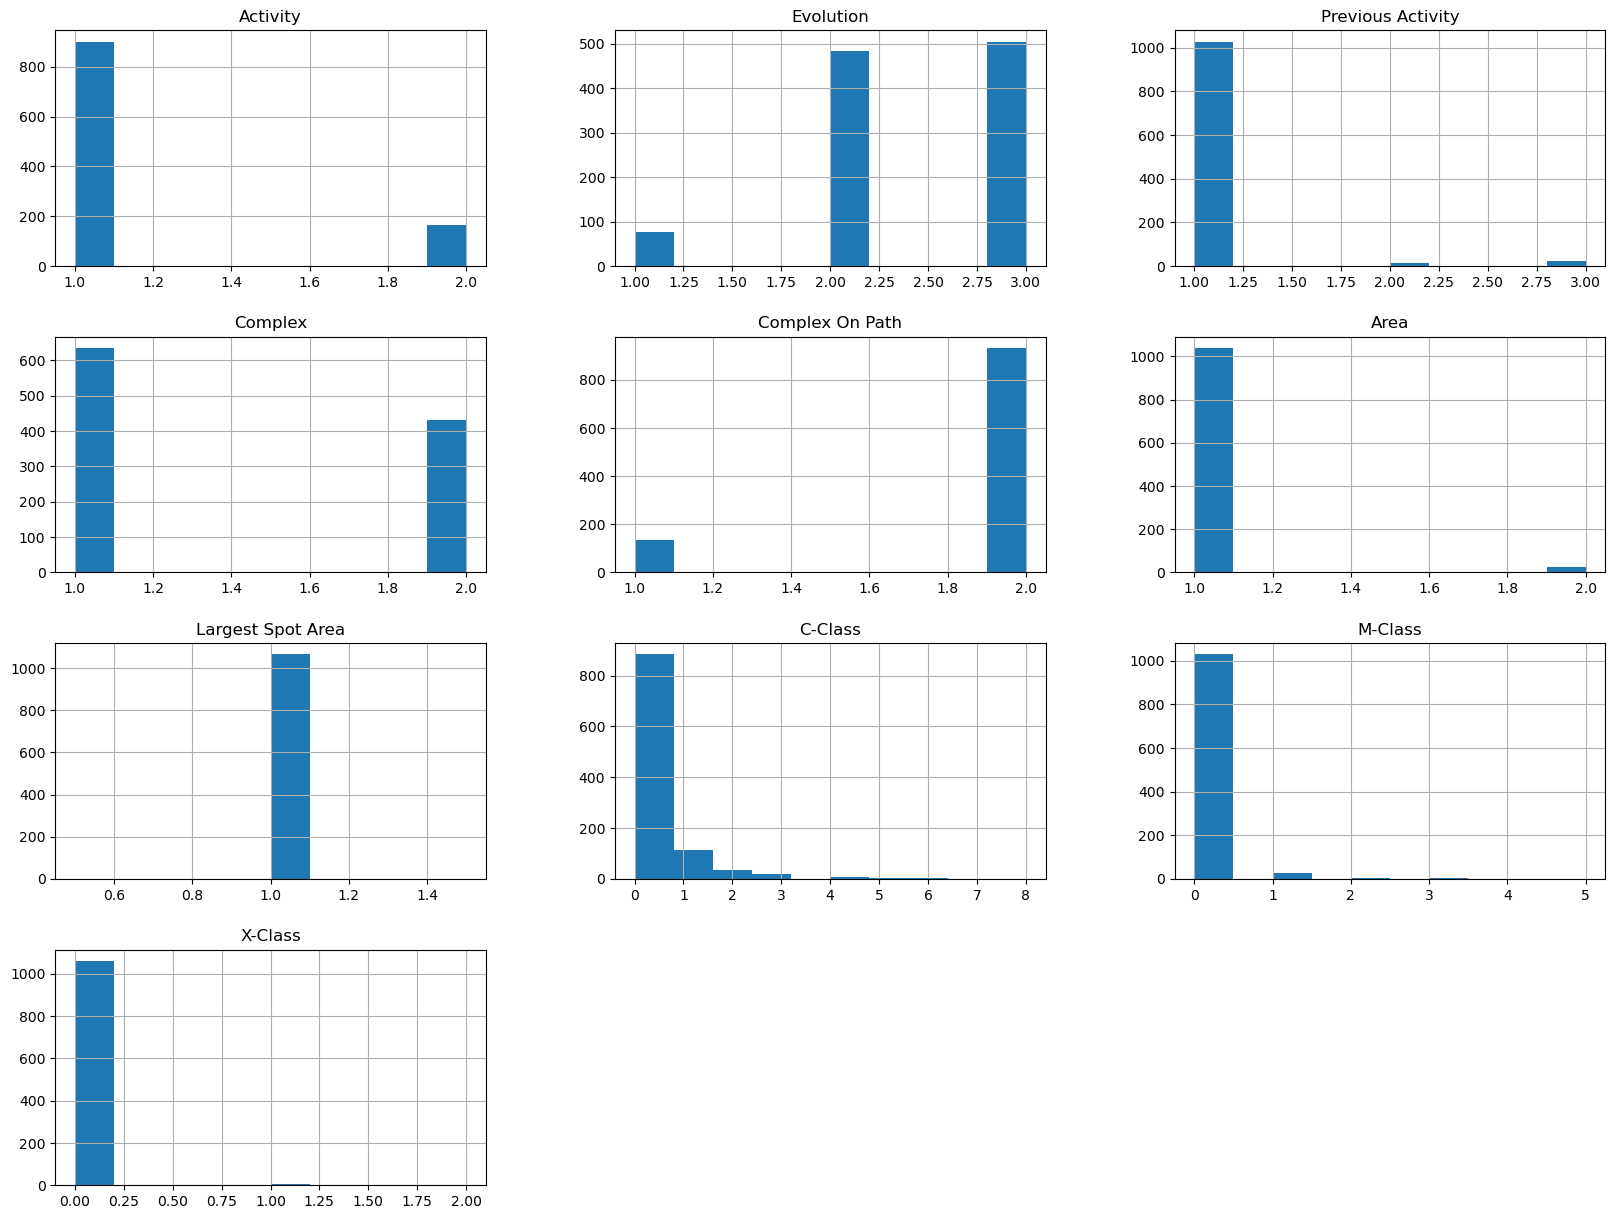

In [135]:
df.hist(figsize=(20, 15))

## Data Preprocessing
- Check for missing values (there shouldn't be any)
- Transform categorical data into numerical data

### Check for missing values

In [136]:
df.isnull().any()

Class                False
Largest Spot         False
Spot Distribution    False
Activity             False
Evolution            False
Previous Activity    False
Complex              False
Complex On Path      False
Area                 False
Largest Spot Area    False
C-Class              False
M-Class              False
X-Class              False
dtype: bool

In [137]:
df["Class"].unique()

array(['H', 'D', 'C', 'B', 'E', 'F'], dtype=object)

In [138]:
df["Largest Spot"].unique()

array(['A', 'R', 'S', 'X', 'K', 'H'], dtype=object)

In [139]:
df["Spot Distribution"].unique()

array(['X', 'O', 'I', 'C'], dtype=object)

### Transform categorical data into numerical data
Since the models we're going to use require numerical data, we need to transform the categorical data into numerical data. We're going to use the OrdinalEncoder from sklearn to do this.

In [140]:
encoder = OrdinalEncoder()
for col in ["Class", "Largest Spot", "Spot Distribution"]:
    df[col] = encoder.fit_transform(df[col].values.reshape(-1, 1))
    df[col] = df[col].astype("int")
df

,Class,Largest Spot,Spot Distribution,Activity,Evolution,Previous Activity,Complex,Complex On Path,Area,Largest Spot Area,C-Class,M-Class,X-Class
0,5,0,3,1,3,1,1,1,1,1,0,0,0
1,2,3,2,1,3,1,1,2,1,1,0,0,0
2,1,4,2,1,3,1,1,2,1,1,0,0,0
3,5,3,3,1,2,1,1,1,1,1,0,0,0
4,5,4,3,1,1,1,1,2,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,5,4,3,1,2,1,1,1,1,1,0,0,0
1062,5,4,3,2,2,1,1,2,1,1,0,0,0
1063,1,4,2,1,2,1,2,2,1,1,0,0,0
1064,5,3,3,1,2,1,1,2,1,1,0,0,0


## Exploratory Data Analysis
### Boxplot

<Axes: >

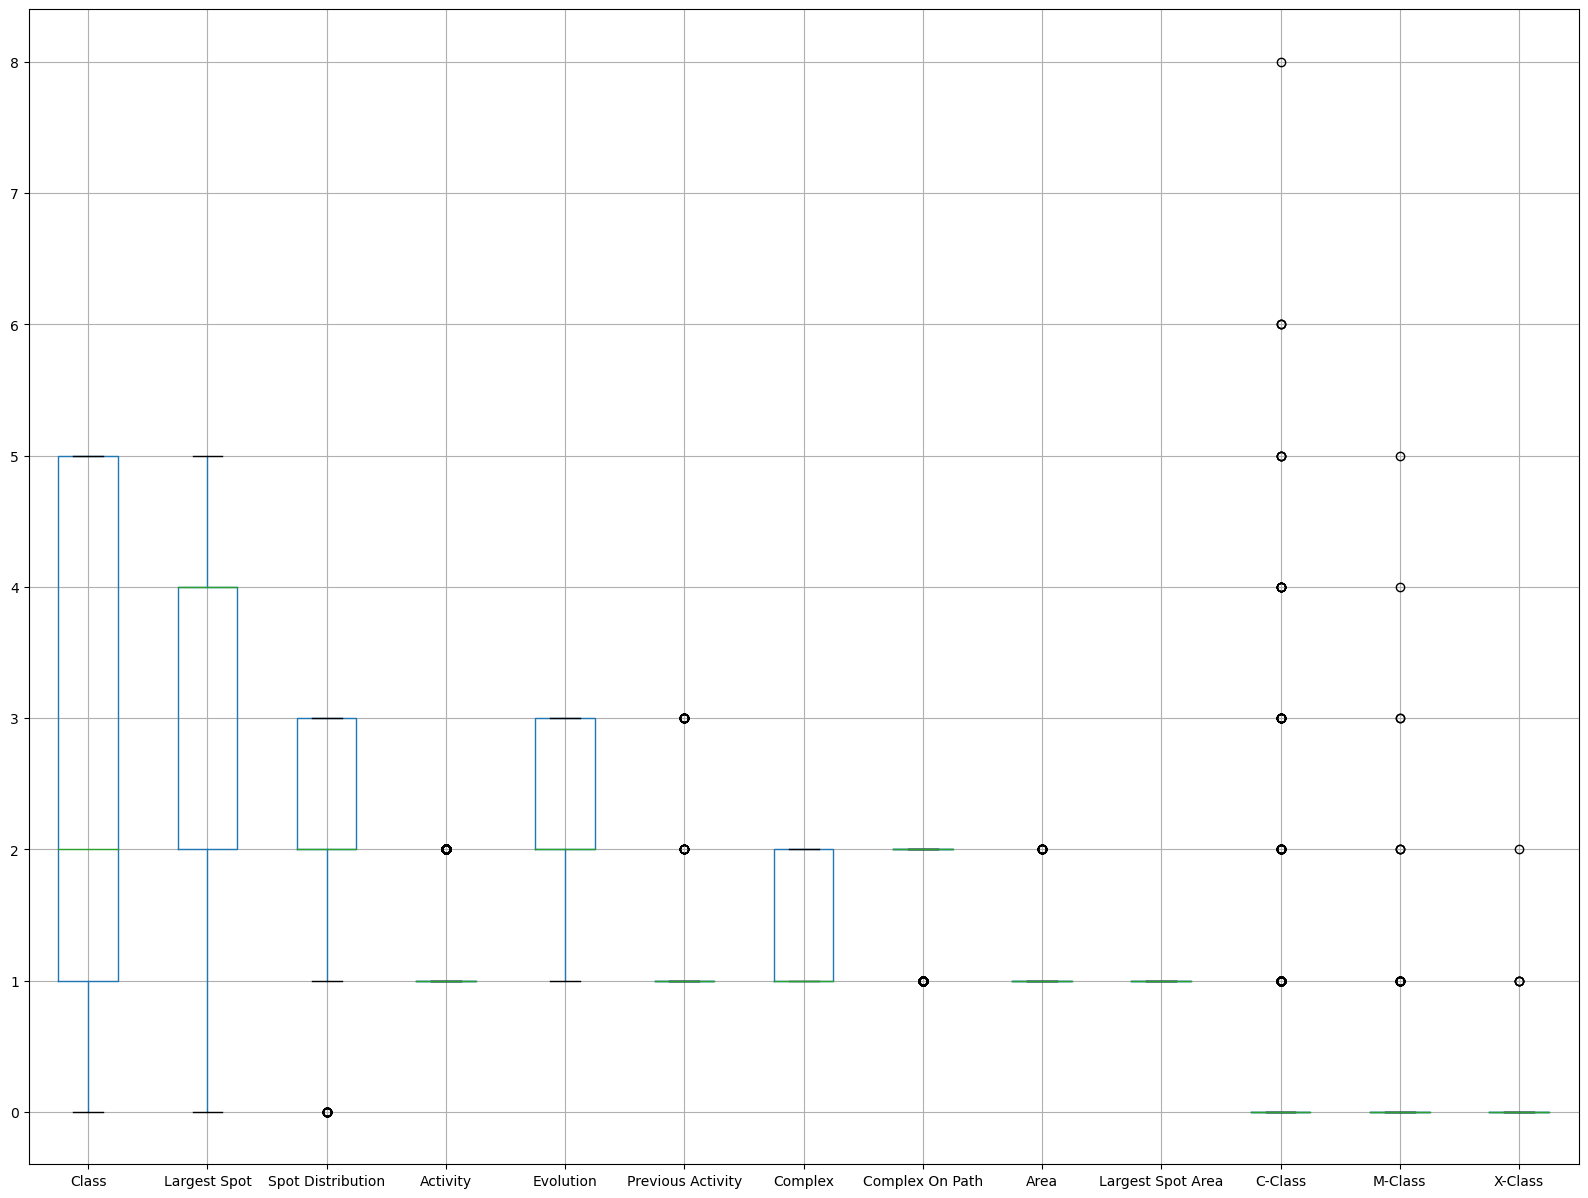

In [141]:
df.boxplot(figsize=(20, 15))

### Correlation Matrix

<Axes: >

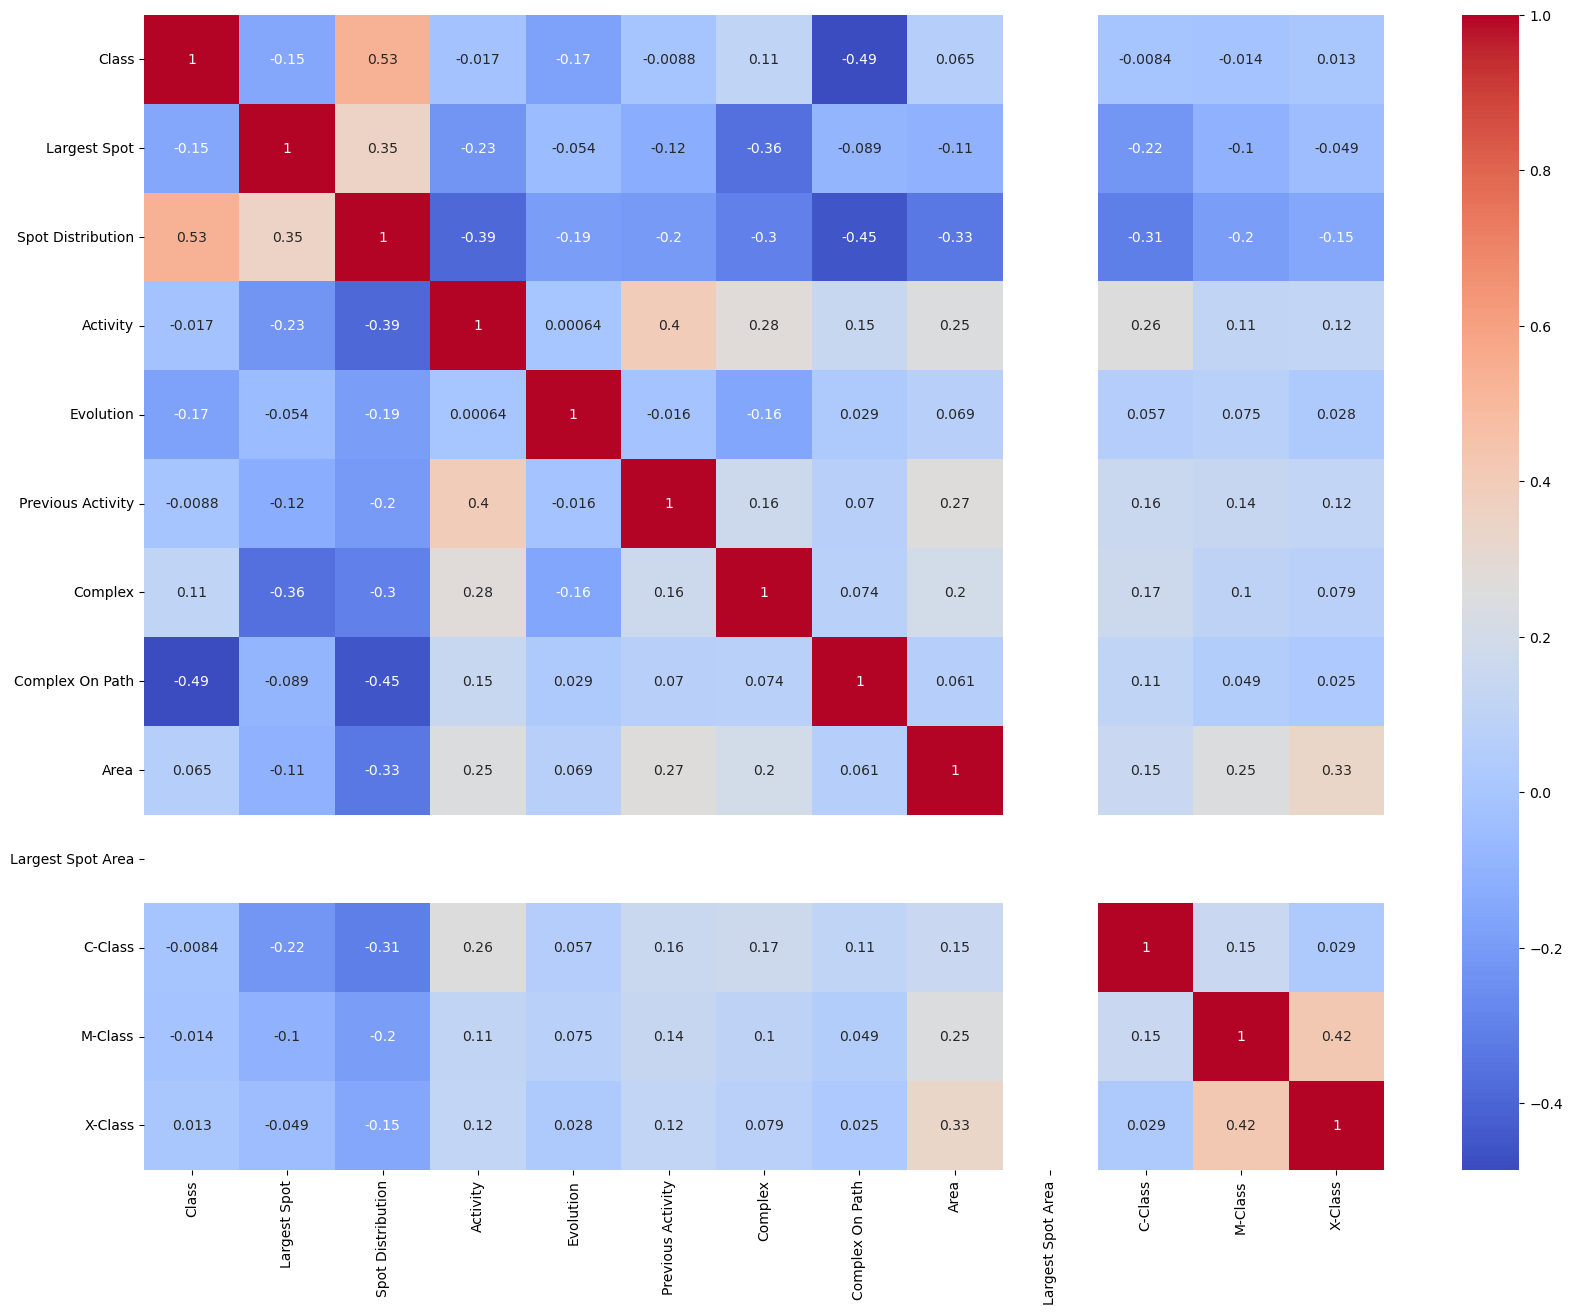

In [142]:
corr = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, cmap="coolwarm")

From the correlation matrix we can see that the feature "Largest Spot Area" is always 1, so we can drop it.

In [143]:
df.drop("Largest Spot Area", axis=1, inplace=True)

## Biplot PCA
We're going to use PCA to reduce the dimensionality of the dataset and then plot it in a biplot.

In [144]:
# PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
pca = PCA(n_components=2)
PC1 = pca.fit_transform(data_scaled)[:,0]
PC2 = pca.fit_transform(data_scaled)[:,1]
ldngs = pca.components_

scalePC1 = 1.0/(PC1.max() - PC1.min())
scalePC2 = 1.0/(PC2.max() - PC2.min())
features = df.columns

<Figure size 640x480 with 0 Axes>

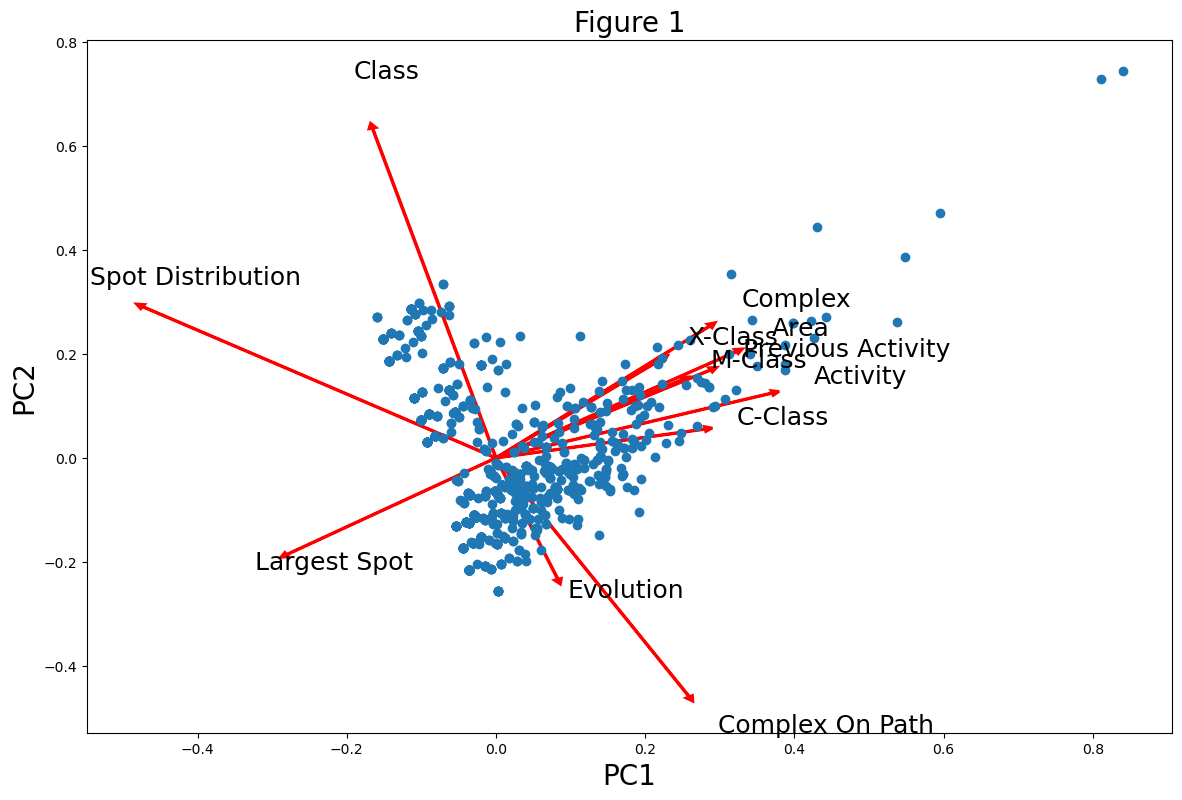

<Figure size 640x480 with 0 Axes>

In [148]:
fig, ax = plt.subplots(figsize=(14, 9))

for i, feature in enumerate(features):
    ax.arrow(0, 0, ldngs[0, i],
             ldngs[1, i], head_width=0.01, head_length=0.01, linewidth=2, color='red')
    ax.text(ldngs[0, i] * 1.15,
            ldngs[1, i] * 1.15,
            feature, fontsize=18)

ax.scatter(PC1 * scalePC1,PC2 * scalePC2)

ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)
ax.set_title('Figure 1', fontsize=20)
plt.figure()